In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
test_data = pd.read_csv(r"E:\MOVIE DATA\Genre Classification Dataset\test_data.txt", sep=':::',names=["Movie_name","Description"])

In [3]:
test_data.head()

,Movie_name,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [4]:
train_data=pd.read_csv(r"E:\MOVIE DATA\Genre Classification Dataset\train_data.txt", sep=':::',names=["Movie_name","Genre","Description"])

In [5]:
train_data.head()

,Movie_name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
sol=train_data=pd.read_csv(r"E:\MOVIE DATA\Genre Classification Dataset\test_data_solution.txt", sep=':::',names=["Movie_name","Genre","Description"])

In [7]:
sol.head() 

,Movie_name,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [8]:
data = pd.concat([sol, train_data], axis=0) # axis=0 means rows

In [9]:
data.sample(10)  # random 10 rows

,Movie_name,Genre,Description
45514,Enfermés dehors (2006),comedy,The story of a glue-sniffing homeless person ...
14973,The Ring Thing (2015),short,"A couple, a pool, a ring. One misunderstandin..."
51410,"Frihet, Likhet og Det Muslimske Brorskap (2010)",documentary,Has Islam been hijacked by radical extremists...
30505,Back to School with Franklin (2003),family,"After a fun-filled summer, Franklin and his f..."
50707,"""Marino 2016"" (2016)",comedy,The Debate of the Century - Mike Marino is fi...
51981,Oil Boss (????),history,"Hellfighter Myron Kinley Saga, Red Adair's me..."
11232,Look @ Me (2006),thriller,Tina Tremaine works for a banking investment ...
19175,Lone Echo (2017),adventure,"Set in the year 2126, Lone Echo casts players..."
44810,"""Quarter Water Juices"" (2016)",drama,Quarter Water Juices (QWJ) is an urban opera ...
49098,Rowing the Pacific (2012),documentary,Mick Dawson and Chris Martin faced hurricanes...


In [10]:
import re
# Function to extract year from each movie name
def extract_year(Movie_name):
    match = re.search(r'\((\d{4})\)', Movie_name)
    if match:
        return match.group(1)
    return None  # In case there's no match

In [11]:
# Apply the function to the Movie_name column to create a new column 'Year'
data['Year'] = data['Movie_name'].apply(extract_year)

In [12]:
data.head()

,Movie_name,Genre,Description,Year
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",1998
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",1977
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,2010
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",2015
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,1955


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108400 entries, 1 to 54200
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Movie_name   108400 non-null  object
 1   Genre        108400 non-null  object
 2   Description  108400 non-null  object
 3   Year         99630 non-null   object
dtypes: object(4)
memory usage: 4.1+ MB


In [14]:
data['Year'] = data['Year'].fillna('-')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108400 entries, 1 to 54200
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Movie_name   108400 non-null  object
 1   Genre        108400 non-null  object
 2   Description  108400 non-null  object
 3   Year         108400 non-null  object
dtypes: object(4)
memory usage: 4.1+ MB


In [16]:
data.describe()

,Movie_name,Genre,Description,Year
count,108400,108400,108400,108400
unique,54200,27,54072,132
top,Edgar's Lunch (1998),drama,Grammy - music award of the American academy ...,-
freq,2,27224,20,8770


**count:** The total number of entries for each column, which is 108,400.
**unique:** The number of unique values in each column. For example, there are 54,200 unique movie names and 27 unique genres.
**top:** The most frequently occurring value in each column. For instance, “Edgar’s Lunch (1998)” is the most common movie name, and “drama” is the most common genre.
**freq:** The frequency of the most common value. For example, “Edgar’s Lunch (1998)” appears twice, and the genre “drama” appears 27,224 times.

Text(0.5, 1.0, 'Genre distripution')

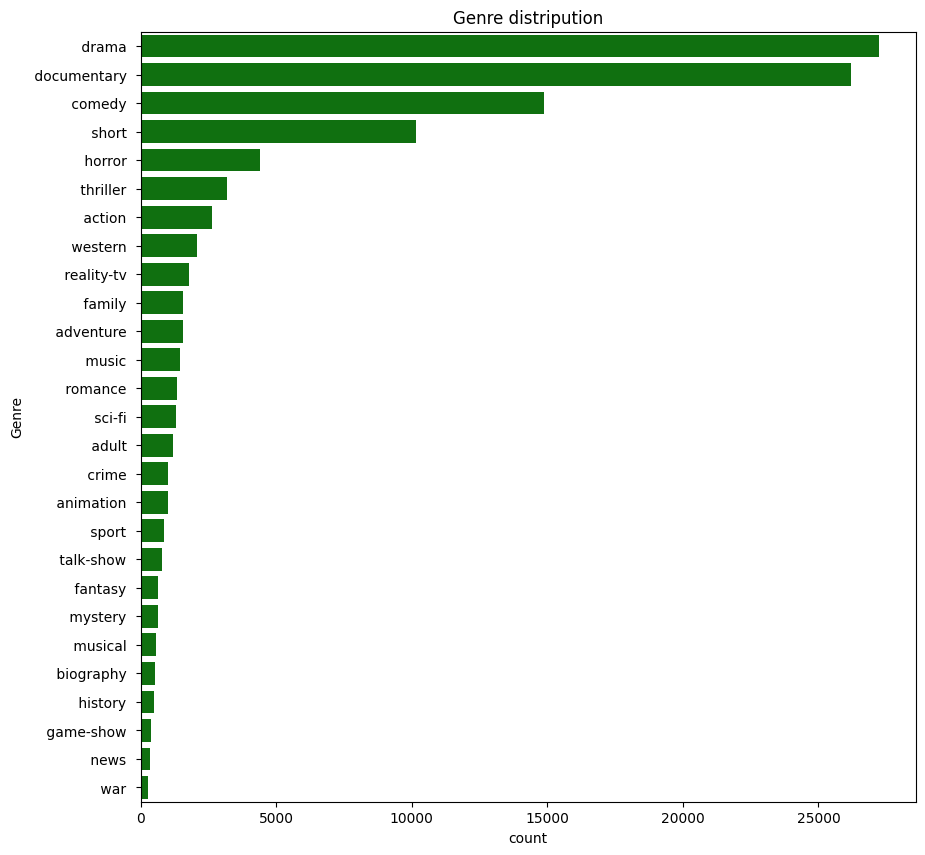

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.countplot(data=data, y="Genre", order=data["Genre"].value_counts().index, color="green")
plt.title("Genre distripution")

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [19]:
# Preprocess the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Description'])  # Transform the 'Description' column into TF-IDF features
y = data['Genre']  # The target labels (genres)

In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [22]:
# Make predictions
y_pred = model.predict(X_test)

In [23]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.46826568265682655
               precision    recall  f1-score   support

      action        1.00      0.00      0.00       523
       adult        0.00      0.00      0.00       209
   adventure        1.00      0.00      0.01       314
   animation        0.00      0.00      0.00       225
   biography        0.00      0.00      0.00       117
      comedy        0.73      0.17      0.27      2952
       crime        0.00      0.00      0.00       191
 documentary        0.54      0.92      0.68      5174
       drama        0.40      0.90      0.55      5400
      family        0.00      0.00      0.00       322
     fantasy        0.00      0.00      0.00       129
   game-show        0.00      0.00      0.00        72
     history        0.00      0.00      0.00        98
      horror        1.00      0.01      0.01       896
       music        0.00      0.00      0.00       289
     musical        0.00      0.00      0.00       123
     mystery        0.00      0.00

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.6572416974169741
               precision    recall  f1-score   support

      action        0.62      0.37      0.46       523
       adult        0.78      0.33      0.46       209
   adventure        0.72      0.25      0.37       314
   animation        0.75      0.05      0.10       225
   biography        0.00      0.00      0.00       117
      comedy        0.64      0.71      0.67      2952
       crime        0.75      0.09      0.17       191
 documentary        0.70      0.90      0.79      5174
       drama        0.60      0.85      0.70      5400
      family        0.61      0.13      0.21       322
     fantasy        0.60      0.07      0.12       129
   game-show        0.85      0.47      0.61        72
     history        0.00      0.00      0.00        98
      horror        0.73      0.67      0.70       896
       music        0.73      0.52      0.61       289
     musical        0.33      0.02      0.03       123
     mystery   

In [25]:
# Step 7: Function to predict genre based on user input
def predict_genre(new_plot):
    new_plot_tfidf = vectorizer.transform([new_plot])
    return lr_model.predict(new_plot_tfidf)[0]

# Allow user to input plot summaries continuously
while True:
    user_input = input("Enter a movie plot summary (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    predicted_genre = predict_genre(user_input)
    print("Predicted Genre:", predicted_genre)

Enter a movie plot summary (or type 'exit' to quit):  Quarter Water Juices (QWJ) is an urban opera


Predicted Genre:  short 


Enter a movie plot summary (or type 'exit' to quit):  One year in the life of Albin and his family ...


Predicted Genre:  drama 


Enter a movie plot summary (or type 'exit' to quit):  L.R. Brane loves his life - his car, his apar...	


Predicted Genre:  drama 


Enter a movie plot summary (or type 'exit' to quit):  L.R. Brane loves his life - his car, his apar...	


Predicted Genre:  drama 


Enter a movie plot summary (or type 'exit' to quit):  L.R. Brane loves his life - his car, his apar...	


Predicted Genre:  drama 


Enter a movie plot summary (or type 'exit' to quit):  L.R. Brane loves his life - his car, his apar...	


Predicted Genre:  drama 


Enter a movie plot summary (or type 'exit' to quit):  exit
